# Loan Status Prediction

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.special import boxcox1p
from scipy.stats import skew, norm, probplot
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [64]:
train = pd.read_csv('/Users/Elizabeth/Desktop/Datasets/AVidhya/Loan Predictor/train.csv')
test = pd.read_csv('/Users/Elizabeth/Desktop/Datasets/AVidhya/Loan Predictor/test.csv')

In [65]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [66]:
print train.shape

(614, 13)


In [67]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [68]:
test.shape

(367, 12)

In [69]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001888,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [70]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Null variables for each column

In [71]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Impute the null values in each column using the mode for the categorical and ordinal variables and the mean for the inerval ones.

In [73]:
mode_columns = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']

train.loc[:, mode_columns] = train[mode_columns].apply(lambda x: x.fillna(x.mode()[0]))
test.loc[:, mode_columns] = test[mode_columns].apply(lambda x: x.fillna(train[x.name].mode()[0]))

In [74]:
train.loc[:, 'LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
test.loc[:, 'LoanAmount'] = test['LoanAmount'].fillna(train['LoanAmount'].mean())

In [75]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

We check the distribution of the target values

In [77]:
train_ids = train['Loan_ID']
train.drop('Loan_ID', axis=1, inplace=True)

In [78]:
train['Loan_Status'].value_counts()/float(train.shape[0])

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

We see that we have an imbalanced dataset. Since this dataset is relatively small, we shall use oversampling to make it more balanced. We shall increase the apriori of the 'N' target values to 0.45 from 0.31.

In [79]:
final_apriori = 0.45

n_df = train[train.Loan_Status=='N']
y_df = train[train.Loan_Status=='Y']

n_numb = len(n_df)
y_numb = len(y_df)

o_rate = (final_apriori* y_numb)/(n_numb*(1-final_apriori))

n_df = n_df.sample(frac=o_rate, replace=True)

train = pd.concat([y_df, n_df], axis=0, ignore_index=True)

In [80]:
train.shape

(767, 12)

In [81]:
train['Loan_Status'].value_counts()/float(train.shape[0])

Y    0.550196
N    0.449804
Name: Loan_Status, dtype: float64

The dataset is now much more balanced than before.

In [82]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y


In [83]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [84]:
test_ids = test['Loan_ID']
test.drop('Loan_ID', axis=1, inplace=True)

In [85]:
train_end = train.shape[0]

target = train['Loan_Status']
train.drop('Loan_Status', axis=1, inplace=True)

all_df = pd.concat([train,test], axis=0, ignore_index=True)
all_df.shape

(1134, 11)

In [86]:
all_df.loc[:, 'Loan_Amount_Term'] = all_df['Loan_Amount_Term'].astype('category')
all_df.loc[:, 'Credit_History'] = all_df['Credit_History'].astype('category')

all_df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term     category
Credit_History       category
Property_Area          object
dtype: object

# Normalization

We focus on the interval variables to make usre that they are not skewed. This will help the linear models we may use along the way.

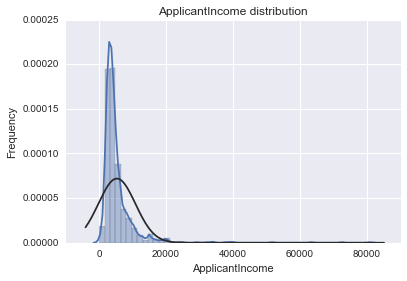

In [87]:
sns.distplot(all_df['ApplicantIncome'],fit=norm)
plt.title('ApplicantIncome distribution')
plt.ylabel('Frequency');

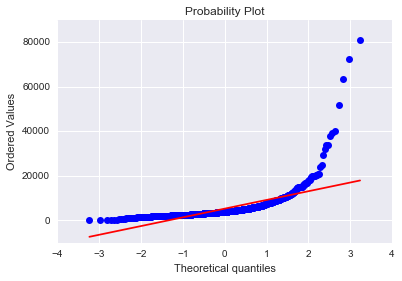

In [88]:
res = probplot(all_df['ApplicantIncome'], plot=plt)

The column Applicant income is heavily left skewd as show above from the histogram and the probability plot. Let's look at the skew of all the numerical variables.

In [89]:
interval_columns = all_df.select_dtypes(include=['float', 'int'])
interval_columns.apply(skew)

ApplicantIncome      6.760487
CoapplicantIncome    6.906688
LoanAmount           2.608975
dtype: float64

All the numerical variables have high skew. We shall reduce this and normalize them using the Box-Cox transformation.

In [90]:
def box_then_skew(col):
    sk = skew(col)
    max_sk = 0.75
    lam =3
    while sk>0.75:
        box = boxcox1p(col, lam)
        sk = skew(box)
        lam-=0.1
    return box

interval_columns = interval_columns.apply(box_then_skew)

In [91]:
all_df.loc[:, interval_columns.columns] = interval_columns

In [92]:
all_df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term     category
Credit_History       category
Property_Area          object
dtype: object

### Create dummy variables

First we re-organize the dtypes for some of the variables. Particularly, we make Dependents and Loan_Amount_Term ordinal because I think there's some predictive power in their ordering. By doing this I will cast each of the values to a corresponding integer value n either column.

In [93]:
all_df.loc[:, 'Dependents'] = all_df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

all_df.loc[:, 'Loan_Amount_Term'] = all_df['Loan_Amount_Term'].astype('int')

In [94]:
all_df.dtypes

Gender                 object
Married                object
Dependents              int64
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term        int64
Credit_History       category
Property_Area          object
dtype: object

In [95]:
dummy_cols = all_df.select_dtypes(include=['object', 'category']).columns

all_df = pd.get_dummies(all_df, columns=dummy_cols, drop_first=True)

all_df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,0,13.807598,0.000000,11.575331,360,1,0,0,0,1,0,1
1,0,12.270327,0.000000,8.434627,360,1,1,0,1,1,0,1
2,0,11.939628,53.351030,10.717897,360,1,1,1,0,1,0,1
3,0,13.868348,0.000000,11.408967,360,1,0,0,0,1,0,1
4,2,13.625657,67.825948,14.503559,360,1,1,0,1,1,0,1


### Create interaction variables

In [96]:
poly = PolynomialFeatures(include_bias=False)
interactions = pd.DataFrame(poly.fit_transform(interval_columns))
interactions.columns = poly.get_feature_names(interval_columns.columns)
interactions.drop(interval_columns.columns, axis=1)

all_df = pd.concat([all_df, interactions], axis=1)
all_df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,...,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,ApplicantIncome^2,ApplicantIncome CoapplicantIncome,ApplicantIncome LoanAmount,CoapplicantIncome^2,CoapplicantIncome LoanAmount,LoanAmount^2
0,0,13.807598,0.000000,11.575331,360,1,0,0,0,1,...,1,13.807598,0.000000,11.575331,190.649771,0.000000,159.827523,0.000000,0.000000,133.988290
1,0,12.270327,0.000000,8.434627,360,1,1,0,1,1,...,1,12.270327,0.000000,8.434627,150.560932,0.000000,103.495631,0.000000,0.000000,71.142928
2,0,11.939628,53.351030,10.717897,360,1,1,1,0,1,...,1,11.939628,53.351030,10.717897,142.554706,636.991426,127.967700,2846.332378,571.810848,114.873318
3,0,13.868348,0.000000,11.408967,360,1,0,0,0,1,...,1,13.868348,0.000000,11.408967,192.331078,0.000000,158.223523,0.000000,0.000000,130.164523
4,2,13.625657,67.825948,14.503559,360,1,1,0,1,1,...,1,13.625657,67.825948,14.503559,185.658537,924.173126,197.620520,4600.359247,983.717621,210.353215


### Feature scaling

We also do feature scaling on the interval variables so that they lie within the same range. Before we do this we sall first split our big dataframe back into te train and test datasets to avoid data leakage.

In [97]:
train = all_df.iloc[:train_end, :]
test = all_df.iloc[train_end:, :]

print 'train shape is {}'.format(train.shape)
print 'test shape is {}'.format(test.shape)

train shape is (767, 21)
test shape is (367, 21)


In [36]:
train.dtypes

Dependents                             int64
ApplicantIncome                      float64
CoapplicantIncome                    float64
LoanAmount                           float64
Loan_Amount_Term                       int64
Gender_Male                            uint8
Married_Yes                            uint8
Education_Not Graduate                 uint8
Self_Employed_Yes                      uint8
Credit_History_1.0                     uint8
Property_Area_Semiurban                uint8
Property_Area_Urban                    uint8
ApplicantIncome                      float64
CoapplicantIncome                    float64
LoanAmount                           float64
ApplicantIncome^2                    float64
ApplicantIncome CoapplicantIncome    float64
ApplicantIncome LoanAmount           float64
CoapplicantIncome^2                  float64
CoapplicantIncome LoanAmount         float64
LoanAmount^2                         float64
dtype: object

In [37]:
scaler = StandardScaler()

interval_columns = train.select_dtypes(include=['float'])

test_interval_columns = test.select_dtypes(include=['float'])

scaled_train = pd.DataFrame(scaler.fit_transform(interval_columns), columns = interval_columns.columns)
scaled_test = pd.DataFrame(scaler.transform(test_interval_columns), columns = test_interval_columns.columns)

In [106]:
test.reset_index(drop=True, inplace=True)
scaled_test.reset_index(drop=True, inplace=True)

In [108]:
train.drop(interval_columns.columns, axis=1, inplace=True)
train = pd.concat([train, scaled_train], axis=1)

test.drop(test_interval_columns.columns, axis=1, inplace=True)
test = pd.concat([test, scaled_test], axis=1)

/Users/Elizabeth/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Elizabeth/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [109]:
test.head()

,Dependents,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,...,LoanAmount,ApplicantIncome,CoapplicantIncome,LoanAmount,ApplicantIncome^2,ApplicantIncome CoapplicantIncome,ApplicantIncome LoanAmount,CoapplicantIncome^2,CoapplicantIncome LoanAmount,LoanAmount^2
0,0,360,1,1,0,0,1,0,1,0.474043,...,-0.353541,0.474043,-0.990132,-0.353541,0.404862,-0.993023,-0.099297,-0.658936,-0.892589,-0.409527
1,1,360,1,1,0,0,1,0,1,-0.452317,...,-0.097385,-0.452317,0.465978,-0.097385,-0.472248,0.448875,-0.280029,0.046548,0.336368,-0.181797
2,2,360,1,1,0,0,1,0,1,0.268228,...,0.945486,0.268228,0.582308,0.945486,0.201687,0.704430,0.711599,0.163774,0.713749,0.870048
3,2,360,1,1,0,0,1,0,1,-0.842760,...,-0.527063,-0.842760,0.828399,-0.527063,-0.813151,0.719798,-0.687533,0.441438,0.509214,-0.556930
4,0,360,1,0,1,0,1,0,1,-0.360854,...,-0.956227,-0.360854,-0.990132,-0.956227,-0.389923,-0.993023,-0.788417,-0.658936,-0.892589,-0.897688


### Building Models

In [39]:
kfold = KFold(n_splits=5, shuffle=True)

results = cross_val_score(RandomForestClassifier(n_estimators=50), train, target, cv=kfold)
results.mean()

0.88797215856039391

In [40]:
results = cross_val_score(SVC(kernel='linear'), train, target, cv=kfold)
results.mean()

0.74833206009676601

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target)

In [42]:
clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':range(40,100,5)}, cv=kfold)
clf.fit(train, target)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
clf.best_params_

{'n_estimators': 75}

In [45]:
bestrf = clf.best_estimator_
bestrf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [46]:
results = cross_val_score(bestrf, train, target, cv=kfold)
results.mean()

0.87999320940497405

In [52]:
clf_svc = GridSearchCV(SVC(), {'kernel':('linear','rbf'), 'C':range(1,10)})
clf_svc.fit(train,target)
clf_svc.best_params_

{'C': 2, 'kernel': 'rbf'}

In [54]:
results = cross_val_score(clf_svc.best_estimator_, train, target, cv=kfold)
results.mean()

0.77450980392156854

In [110]:
test.shape

(367, 21)

In [111]:
test_y = pd.Series(clf.predict(test))

In [113]:
test_y.name ='Loan_Status'

In [121]:
submission = pd.concat([test_ids.to_frame(), test_y.to_frame()], axis=1)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [124]:
submission.to_csv('/Users/Elizabeth/Desktop/Datasets/AVidhya/submission.csv')

In [130]:
submission2 = pd.DataFrame(bestrf.predict(test), columns=['Loan_Status'])
submission2['Loan_ID'] = test_ids

submission2 = submission2[['Loan_ID', 'Loan_Status']]
submission2.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [132]:
submission2.to_csv("/Users/Elizabeth/Desktop/Datasets/AVidhya/Loan Predictor/submission.csv")